In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings 
warnings.simplefilter("ignore")

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [4]:
data =pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [6]:
#Simpleimputer
#StandardScaler
#Encoder
#Model

In [7]:
imputer = SimpleImputer()
scaler = StandardScaler()
model = Ridge()

In [8]:
#M1
pipe = make_pipeline(imputer,scaler,model)
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [9]:
#M2
pipe2 = make_pipeline(SimpleImputer(),StandardScaler(),Ridge())
pipe2

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [10]:
#M3
pipe3 = Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("scaler",StandardScaler()),
    ("ridge",Ridge())
    
    
])
pipe3

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('ridge', Ridge())])

In [11]:
features =["TV","radio","newspaper"]
X,y = data[features],data['sales']
print("X:",X.shape)
print("y:",y.shape)

X: (200, 3)
y: (200,)


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [14]:
coefficients = pipe.named_steps['ridge'].coef_
features 
feat_imp = pd.Series(coefficients,index=features).sort_values(ascending=True,key=abs)
feat_imp

newspaper    0.149011
radio        2.884879
TV           3.658385
dtype: float64

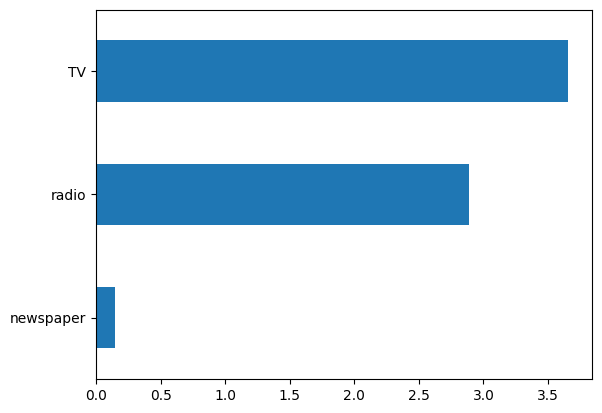

In [15]:
feat_imp.head(10).plot(kind='barh');

In [16]:
pipe.named_steps.ridge.coef_

array([3.6583848 , 2.88487879, 0.1490113 ])

In [17]:
pipe.named_steps["ridge"].coef_

array([3.6583848 , 2.88487879, 0.1490113 ])

In [18]:
pipe.steps[0][1]

SimpleImputer()